In [4]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = r'C:\Users\jbuck\Team Season Recaps\Team Percentile Data.csv'

try:
    team_percentile_data = pd.read_csv(file_path)
    print("CSV file loaded successfully.")
except FileNotFoundError:
    print(f"File not found at the specified path: {file_path}")
    team_percentile_data = pd.DataFrame()  # Ensure the variable is defined
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}")
    team_percentile_data = pd.DataFrame()  # Ensure the variable is defined

if not team_percentile_data.empty:
    # Duplicate the 'Team' column and name it 'Club'
    team_percentile_data['Club'] = team_percentile_data['Team']
    print("Duplicated 'Team' column as 'Club'")
    print(team_percentile_data.head())
else:
    print("The DataFrame is empty. Please check the CSV file path and content.")


CSV file loaded successfully.
Duplicated 'Team' column as 'Club'
          Team              League  Finishing  Shot_Quality  Chance_Creation  \
0      Arsenal  ENG-Premier League  92.567568     75.000000        91.216216   
1  Aston Villa  ENG-Premier League  87.162162     89.864865        80.405405   
2  Bournemouth  ENG-Premier League  29.054054     51.689189        72.972973   
3    Brentford  ENG-Premier League  28.040541     89.864865        75.675676   
4     Brighton  ENG-Premier League  16.891892     51.689189        70.945946   

   Central_Progression  Circulation  Field_Tilt  Deep_Build_Up  \
0            84.459459    91.891892   90.540541      64.189189   
1            64.189189    83.108108   66.891892      79.729730   
2            17.567568    38.513514   54.729730      18.918919   
3            24.324324    25.000000   14.864865      30.067568   
4            92.567568    88.513514   87.162162      99.324324   

   Press_Resistance  Possession  Chance_Prevention  Press

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist
numerical_data = team_percentile_data.select_dtypes(include=[np.number])

# Normalize the numerical columns
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(numerical_data)

# Calculate the Euclidean distances between each team
distances = cdist(normalized_data, normalized_data, metric='euclidean')

# Convert distances to similarity scores (0-100 scale)
max_distance = distances.max()
similarity_scores = (1 - distances / max_distance) * 100

# Create a DataFrame to store similarity scores
similarity_df = pd.DataFrame(similarity_scores, index=team_percentile_data['Team'], columns=team_percentile_data['Team'])

# Display the similarity DataFrame
print(similarity_df)

Team            Arsenal  Aston Villa  Bournemouth   Brentford    Brighton  \
Team                                                                        
Arsenal      100.000000    51.880269    35.487985   34.677084   59.844329   
Aston Villa   51.880269   100.000000    49.120591   43.293399   51.367048   
Bournemouth   35.487985    49.120591   100.000000   68.828956   38.186815   
Brentford     34.677084    43.293399    68.828956  100.000000   38.156727   
Brighton      59.844329    51.367048    38.186815   38.156727  100.000000   
...                 ...          ...          ...         ...         ...   
Porto         73.676178    47.041035    37.772226   35.189788   67.218655   
Rio Ave       47.487347    55.240409    60.874398   53.698237   50.614507   
Sporting CP   80.425340    45.571996    30.829295   33.264559   53.257094   
Vitória       44.241963    41.670539    52.525982   48.072214   36.602628   
Vizela        33.914769    45.533800    69.341930   59.897056   40.896716   

In [8]:
team_percentile_data

,Team,League,Finishing,Shot_Quality,Chance_Creation,Central_Progression,Circulation,Field_Tilt,Deep_Build_Up,Press_Resistance,Possession,Chance_Prevention,Press Intensity,High_Line,Club
0,Arsenal,ENG-Premier League,92.567568,75.000000,91.216216,84.459459,91.891892,90.540541,64.189189,82.432432,86.486486,94.932432,83.108108,81.081081,Arsenal
1,Aston Villa,ENG-Premier League,87.162162,89.864865,80.405405,64.189189,83.108108,66.891892,79.729730,5.405405,68.918919,8.783784,31.756757,99.324324,Aston Villa
2,Bournemouth,ENG-Premier League,29.054054,51.689189,72.972973,17.567568,38.513514,54.729730,18.918919,0.675676,19.594595,23.310811,80.405405,49.324324,Bournemouth
3,Brentford,ENG-Premier League,28.040541,89.864865,75.675676,24.324324,25.000000,14.864865,30.067568,56.756757,29.054054,15.540541,68.243243,20.945946,Brentford
4,Brighton,ENG-Premier League,16.891892,51.689189,70.945946,92.567568,88.513514,87.162162,99.324324,87.837838,91.891892,27.027027,84.459459,88.513514,Brighton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,Porto,POR-League,34.797297,75.000000,85.135135,50.000000,89.189189,98.648649,84.459459,79.054054,97.297297,97.972973,92.567568,95.270270,Porto
144,Rio Ave,POR-League,34.797297,51.689189,13.851351,62.162162,52.702703,37.162162,53.378378,19.594595,50.000000,66.216216,54.729730,82.432432,Rio Ave
145,Sporting CP,POR-League,100.000000,97.297297,96.621622,58.108108,63.513514,95.945946,85.135135,98.648649,89.189189,99.324324,95.945946,85.135135,Sporting CP
146,Vitória,POR-League,72.297297,27.027027,43.243243,9.459459,6.756757,68.243243,28.378378,68.918919,49.324324,81.081081,27.702703,87.162162,Vitória


In [9]:
similarity_df

Team,Arsenal,Aston Villa,Bournemouth,Brentford,Brighton,Burnley,Chelsea,Crystal Palace,Everton,Fulham,...,Famalicão,Farense,Gil Vicente FC,Moreirense,Portimonense,Porto,Rio Ave,Sporting CP,Vitória,Vizela
Team,,,,,,,,,,,,,,,,,,,,,
Arsenal,100.000000,51.880269,35.487985,34.677084,59.844329,42.226706,67.557974,35.991948,25.294990,57.764608,...,35.097604,24.132867,49.439352,31.995419,25.869299,73.676178,47.487347,80.425340,44.241963,33.914769
Aston Villa,51.880269,100.000000,49.120591,43.293399,51.367048,55.415536,65.358534,47.935093,35.262167,70.713256,...,41.578593,34.109812,58.296280,33.751769,36.640708,47.041035,55.240409,45.571996,41.670539,45.533800
Bournemouth,35.487985,49.120591,100.000000,68.828956,38.186815,55.678193,45.122214,69.882812,69.457323,59.019948,...,58.208784,56.165473,57.873262,49.063588,63.243667,37.772226,60.874398,30.829295,52.525982,69.341930
Brentford,34.677084,43.293399,68.828956,100.000000,38.156727,49.633737,46.136698,62.453582,75.985302,58.125834,...,50.196097,67.178557,56.271647,48.008731,56.708693,35.189788,53.698237,33.264559,48.072214,59.897056
Brighton,59.844329,51.367048,38.186815,38.156727,100.000000,52.535874,74.138381,30.445672,29.210487,64.706130,...,35.524867,22.361500,49.504179,27.799380,27.555264,67.218655,50.614507,53.257094,36.602628,40.896716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Porto,73.676178,47.041035,37.772226,35.189788,67.218655,39.036765,62.663287,28.181471,29.152695,55.123886,...,36.443873,20.738503,44.099983,28.626305,23.533250,100.000000,49.388514,72.017441,43.784171,39.504604
Rio Ave,47.487347,55.240409,60.874398,53.698237,50.614507,67.680085,51.986839,61.680502,53.699809,66.166640,...,68.688912,49.252593,81.921358,61.902421,60.898551,49.388514,100.000000,40.045770,59.788814,70.129377
Sporting CP,80.425340,45.571996,30.829295,33.264559,53.257094,31.070526,59.718023,28.755890,23.743908,51.506131,...,30.076531,21.069661,39.718928,25.363256,21.028043,72.017441,40.045770,100.000000,43.000053,30.390266


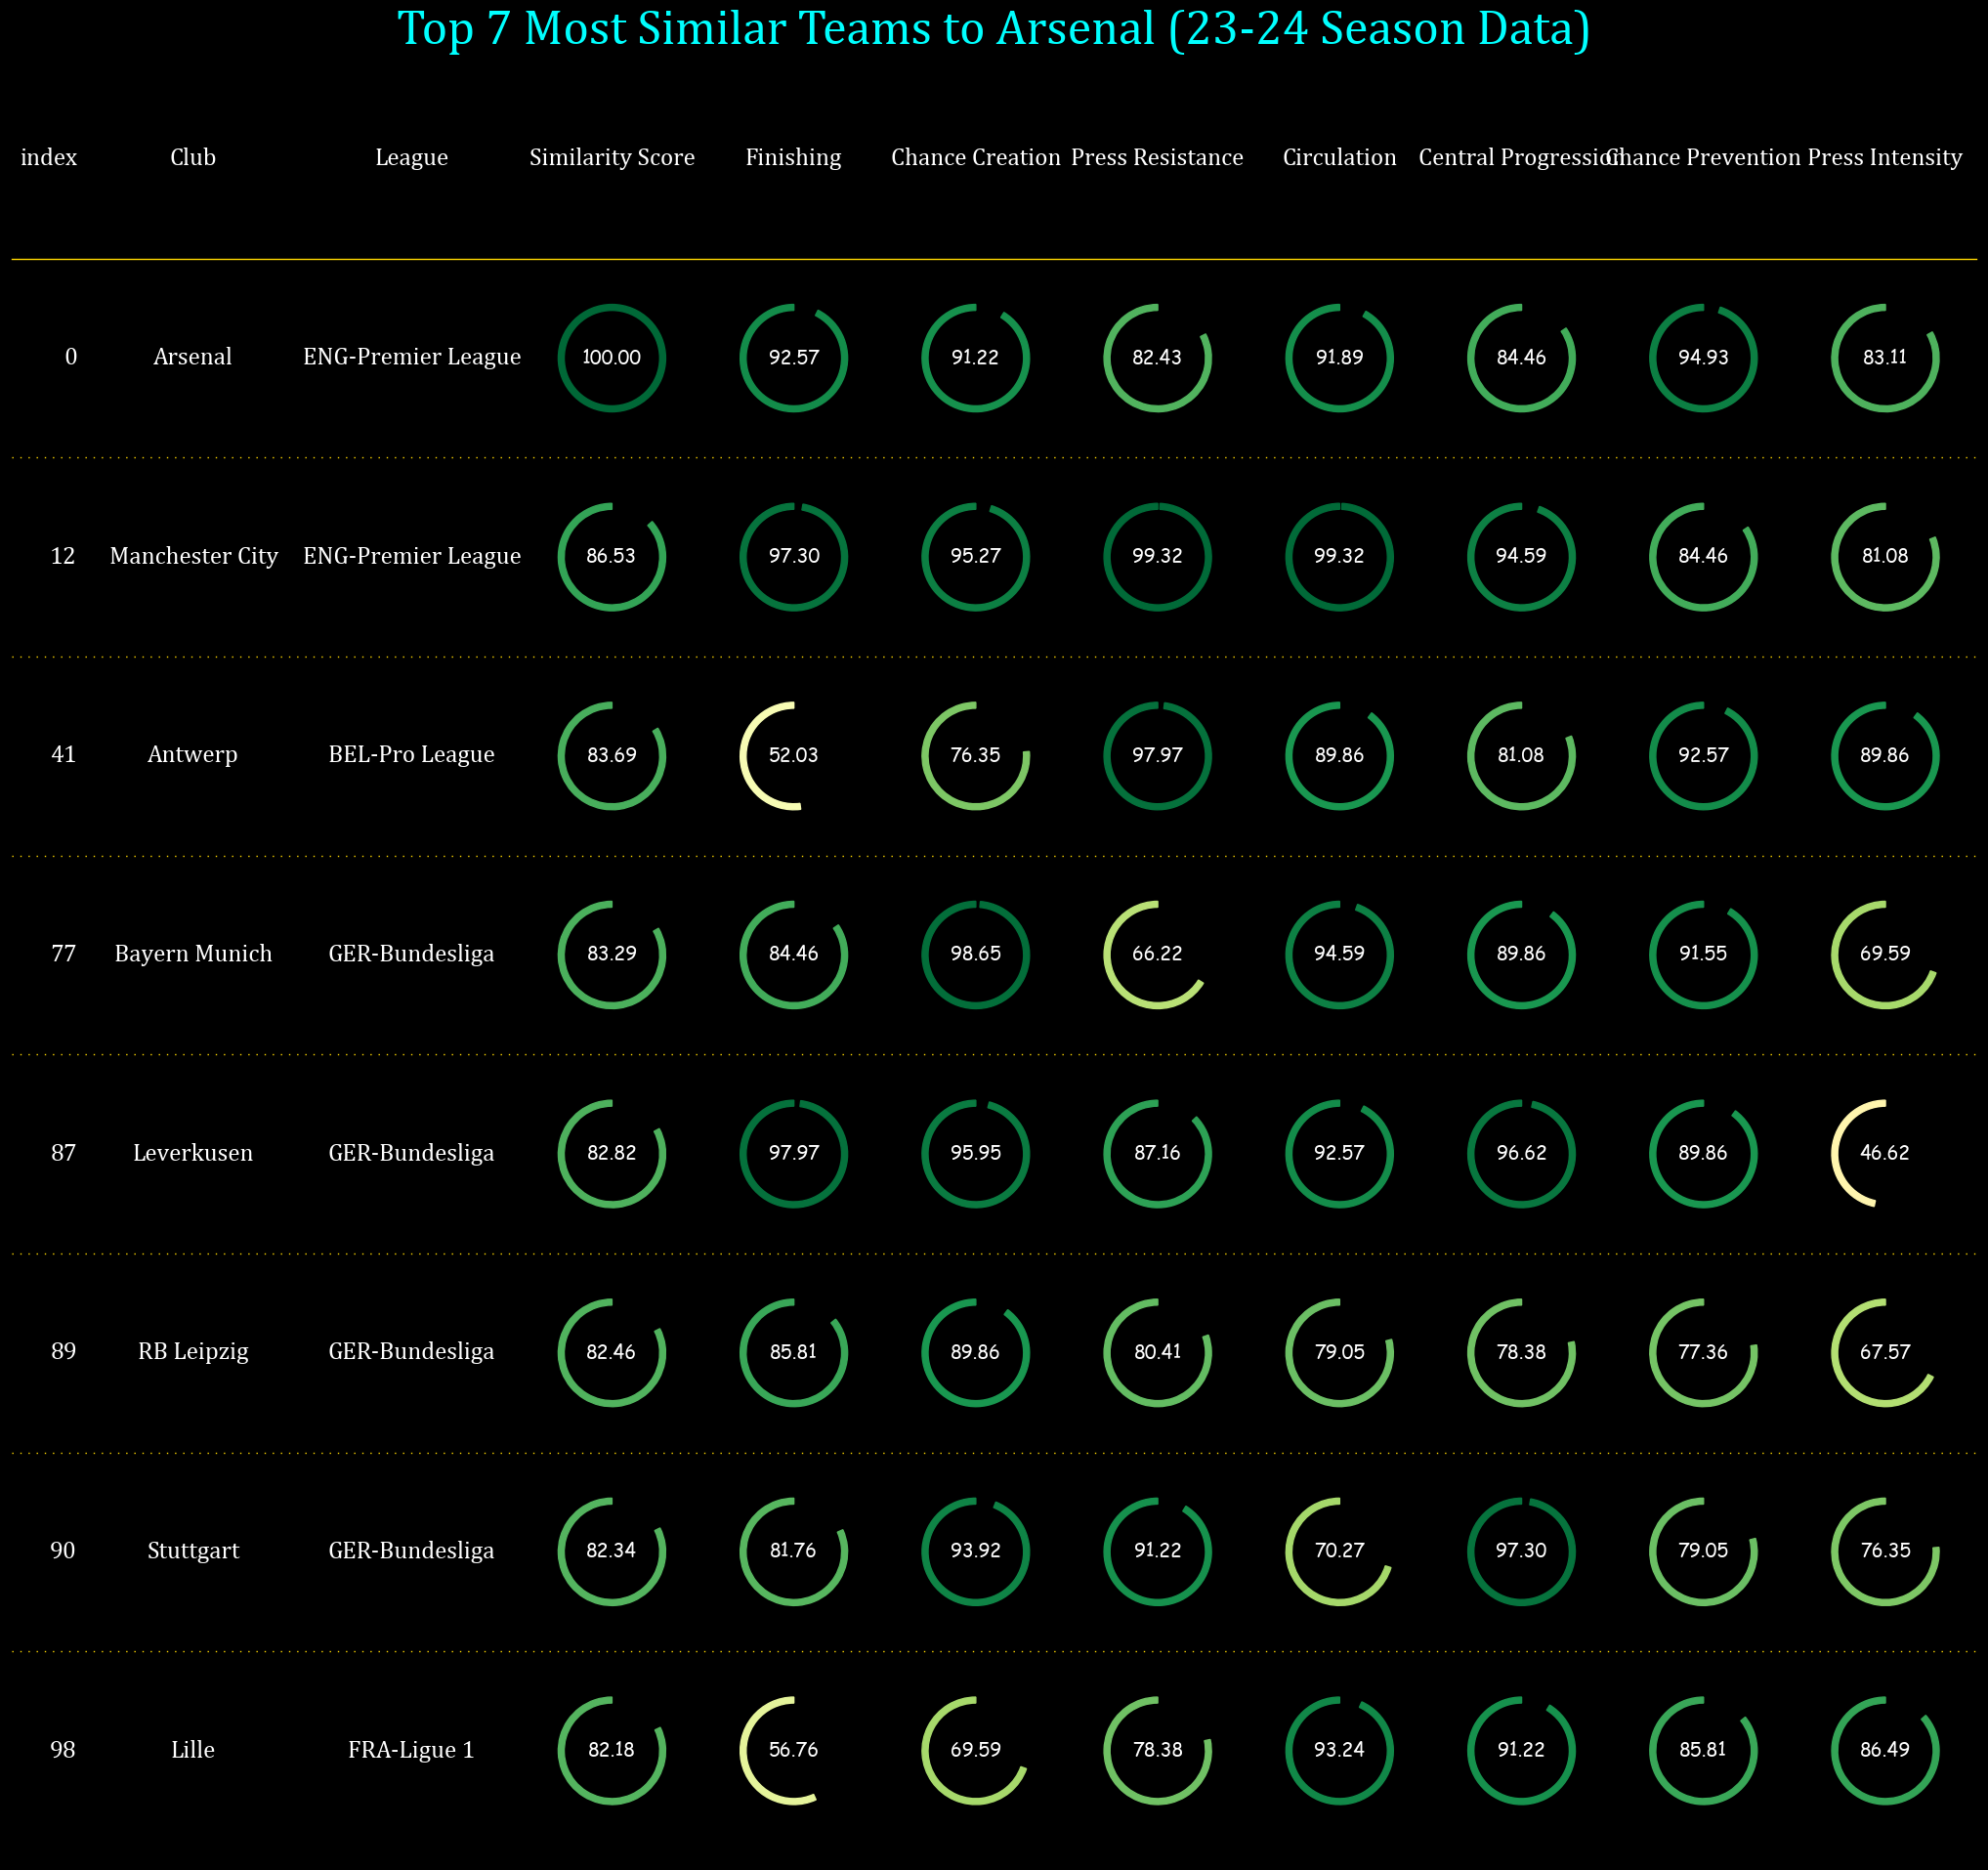

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from plottable import Table, ColumnDefinition
from plottable.plots import progress_donut

# Define the column names
columns = [
    "Club",
    "League",
    "Similarity Score",
    "Finishing",
    "Chance_Creation",
    "Press_Resistance",
    "Circulation",
    "Central_Progression",
    "Chance_Prevention",
    "Press Intensity",
]

# Ensure 'Team' column is not set as the index for team_percentile_data
if 'Team' in team_percentile_data.index.names:
    team_percentile_data.reset_index(inplace=True)

# Duplicate the 'Team' column and name it 'Club'
team_percentile_data['Club'] = team_percentile_data['Team']

# Assuming similarity_df and team_percentile_data are already loaded
# Define team and league for the title
team_name = "Arsenal"
league = team_percentile_data.loc[team_percentile_data['Club'] == team_name, 'League'].values[0]

# Extract similarity scores for the specified team
team_similarity = similarity_df.loc[team_name].drop(team_name)
top_10_similar = team_similarity.nlargest(7)

# Fetch details for the top 7 similar teams
top_7_details = team_percentile_data.loc[team_percentile_data['Club'].isin(top_10_similar.index)].copy()
top_7_details['Similarity Score'] = top_10_similar.values

# Include Arsenal's own details
arsenal_details = team_percentile_data.loc[team_percentile_data['Club'] == team_name].copy()
arsenal_details['Similarity Score'] = 100.0  # Assign a similarity score of 100 to Arsenal itself

# Combine Arsenal's details with the top 7 similar teams
top_7_details = pd.concat([arsenal_details, top_7_details])

# Round all decimal values to 2 decimal places
top_7_details = top_7_details.round(2)
score_columns = [
    "Finishing", 
    "Chance_Creation", 
    "Press_Resistance", 
    "Circulation", 
    "Central_Progression", 
    "Chance_Prevention", 
    "Press Intensity"
]
top_7_details[score_columns] = top_7_details[score_columns]

# Ensure the columns are ordered correctly
top_7_details = top_7_details[columns]

# Function to get color based on value
def get_color(val):
    cmap = plt.get_cmap('RdYlGn')
    norm = Normalize(vmin=0, vmax=100)
    return cmap(norm(val))

# Custom function to format the displayed text
def formatted_progress_donut(ax, val, **kwargs):
    return progress_donut(ax, val, color=get_color(val), is_pct=False, textprops={'color': 'white', 'fontsize': 14, 'fontname': 'Comic Sans MS'}, formatter="{:.2f}".format(val))

# Update column definitions to include color mapping for the progress donuts
col_defs = [
    ColumnDefinition(name="Club", textprops={"ha": "center"}, width=3),
    ColumnDefinition(name="League", textprops={"ha": "center"}, width=3),
    ColumnDefinition(name="Similarity Score", plot_fn=formatted_progress_donut, textprops={"ha": "center"}, width=2.5),
    ColumnDefinition(name="Finishing", title="Finishing", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center"}, width=2.5),
    ColumnDefinition(name="Chance_Creation", title="Chance Creation", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center"}, width=2.5),
    ColumnDefinition(name="Press_Resistance", title="Press Resistance", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center"}, width=2.5),
    ColumnDefinition(name="Circulation", title="Circulation", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center"}, width=2.5),
    ColumnDefinition(name="Central_Progression", title="Central Progression", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center"}, width=2.5),
    ColumnDefinition(name="Chance_Prevention", title="Chance Prevention", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center"}, width=2.5),
    ColumnDefinition(name="Press Intensity", title="Press Intensity", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center"}, width=2.5),
]

# Create the plot
fig, ax = plt.subplots(figsize=(26, 24))
fig.patch.set_facecolor('black')  # Set figure background color to black
ax.set_facecolor('black') 

# Add title to the plot
plt.title(f"Top 7 Most Similar Teams to {team_name} (23-24 Season Data)", color='cyan', fontsize=36, fontname='Cambria')

# Create and style the table using plottable
table = Table(
    top_7_details,
    column_definitions=col_defs,
    row_dividers=True,
    footer_divider=True,
    ax=ax,
    textprops={"fontsize": 18, "color": "white", 'fontname': 'Cambria'},  # Set text color to white
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5)), "color": "gold"},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-", "color": "gold"},
    column_border_kw={"linewidth": 1, "linestyle": "-", "color": "gold"},
)

# Show the plot
plt.show()


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from plottable import Table, ColumnDefinition
from plottable.plots import progress_donut

# Define the column names
columns = [
    "Club",
    "League",
    "Similarity Score",
    "Finishing",
    "Chance_Creation",
    "Press_Resistance",
    "Circulation",
    "Central_Progression",
    "Chance_Prevention",
    "Press Intensity",
]

# Ensure 'Team' column is not set as the index for team_percentile_data
team_percentile_data.reset_index(inplace=True, drop=True)

# Duplicate the 'Team' column and name it 'Club'
team_percentile_data['Club'] = team_percentile_data['Team']

# Assuming similarity_df and team_percentile_data are already loaded
# Define team and league for the title
team_name = "Arsenal"
league = team_percentile_data.loc[team_percentile_data['Club'] == team_name, 'League'].values[0]

# Extract similarity scores for the specified team
team_similarity = similarity_df.loc[team_name].drop(team_name)
top_10_similar = team_similarity.nlargest(7)

# Fetch details for the top 7 similar teams
top_7_details = team_percentile_data.loc[team_percentile_data['Club'].isin(top_10_similar.index)].copy()
top_7_details['Similarity Score'] = top_10_similar.values

# Include Arsenal's own details
arsenal_details = team_percentile_data.loc[team_percentile_data['Club'] == team_name].copy()
arsenal_details['Similarity Score'] = 100.0  # Assign a similarity score of 100 to Arsenal itself

# Combine Arsenal's details with the top 7 similar teams
top_7_details = pd.concat([arsenal_details, top_7_details])

# Round all decimal values to 2 decimal places
top_7_details = top_7_details.round(2)
score_columns = [
    "Finishing", 
    "Chance_Creation", 
    "Press_Resistance", 
    "Circulation", 
    "Central_Progression", 
    "Chance_Prevention", 
    "Press Intensity"
]
top_7_details[score_columns] = top_7_details[score_columns]

# Ensure the columns are ordered correctly
top_7_details = top_7_details[columns]

# Function to get color based on value
def get_color(val):
    cmap = plt.get_cmap('RdYlGn')
    norm = Normalize(vmin=0, vmax=100)
    return cmap(norm(val))

# Custom function to format the displayed text
def formatted_progress_donut(ax, val, **kwargs):
    return progress_donut(ax, val, color=get_color(val), is_pct=False, textprops={'color': 'white', 'fontsize': 14, 'fontname': 'Comic Sans MS'}, formatter="{:.2f}".format(val))

# Update column definitions to include color mapping for the progress donuts
col_defs = [
    ColumnDefinition(name="Club", textprops={"ha": "center"}, width=3),
    ColumnDefinition(name="League", textprops={"ha": "center"}, width=3),
    ColumnDefinition(name="Similarity Score", plot_fn=formatted_progress_donut, textprops={"ha": "center"}, width=2.5),
    ColumnDefinition(name="Finishing", title="Finishing", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center"}, width=2.5),
    ColumnDefinition(name="Chance_Creation", title="Chance Creation", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center"}, width=2.5),
    ColumnDefinition(name="Press_Resistance", title="Press Resistance", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center"}, width=2.5),
    ColumnDefinition(name="Circulation", title="Circulation", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center"}, width=2.5),
    ColumnDefinition(name="Central_Progression", title="Central Progression", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center"}, width=2.5),
    ColumnDefinition(name="Chance_Prevention", title="Chance Prevention", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center"}, width=2.5),
    ColumnDefinition(name="Press Intensity", title="Press Intensity", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center"}, width=2.5),
]

# Create the plot
fig, ax = plt.subplots(figsize=(26, 24))
fig.patch.set_facecolor('black')  # Set figure background color to black
ax.set_facecolor('black') 

# Add title to the plot
plt.title(f"Top 7 Most Similar Teams to {team_name} (23-24 Season Data)", color='cyan', fontsize=36, fontname='Cambria')

# Create and style the table using plottable
table = Table(
    top_7_details.reset_index(drop=True),  # Reset index and drop the old index
    column_definitions=col_defs,
    row_dividers=True,
    footer_divider=True,
    col_label_divider=True,
    ax=ax,
    textprops={"fontsize": 18, "color": "white", 'fontname': 'Cambria'},  # Set text color to white
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5)), "color": "gold"},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-", "color": "gold"},
    column_border_kw={"linewidth": 1, "linestyle": "-", "color": "gold"},
    index_col=["Club']  # Ensure index column is not shown
)

# Show the plot
plt.show()


SyntaxError: unterminated string literal (detected at line 114) (4240196186.py, line 114)

In [ ]:
top_7_details

In [12]:
top_7_details

,Club,League,Similarity Score,Finishing,Chance_Creation,Press_Resistance,Circulation,Central_Progression,Chance_Prevention,Press Intensity
index,,,,,,,,,,
0,Arsenal,ENG-Premier League,100.00,92.57,91.22,82.43,91.89,84.46,94.93,83.11
12,Manchester City,ENG-Premier League,86.53,97.30,95.27,99.32,99.32,94.59,84.46,81.08
41,Antwerp,BEL-Pro League,83.69,52.03,76.35,97.97,89.86,81.08,92.57,89.86
77,Bayern Munich,GER-Bundesliga,83.29,84.46,98.65,66.22,94.59,89.86,91.55,69.59
87,Leverkusen,GER-Bundesliga,82.82,97.97,95.95,87.16,92.57,96.62,89.86,46.62
89,RB Leipzig,GER-Bundesliga,82.46,85.81,89.86,80.41,79.05,78.38,77.36,67.57
90,Stuttgart,GER-Bundesliga,82.34,81.76,93.92,91.22,70.27,97.30,79.05,76.35
98,Lille,FRA-Ligue 1,82.18,56.76,69.59,78.38,93.24,91.22,85.81,86.49


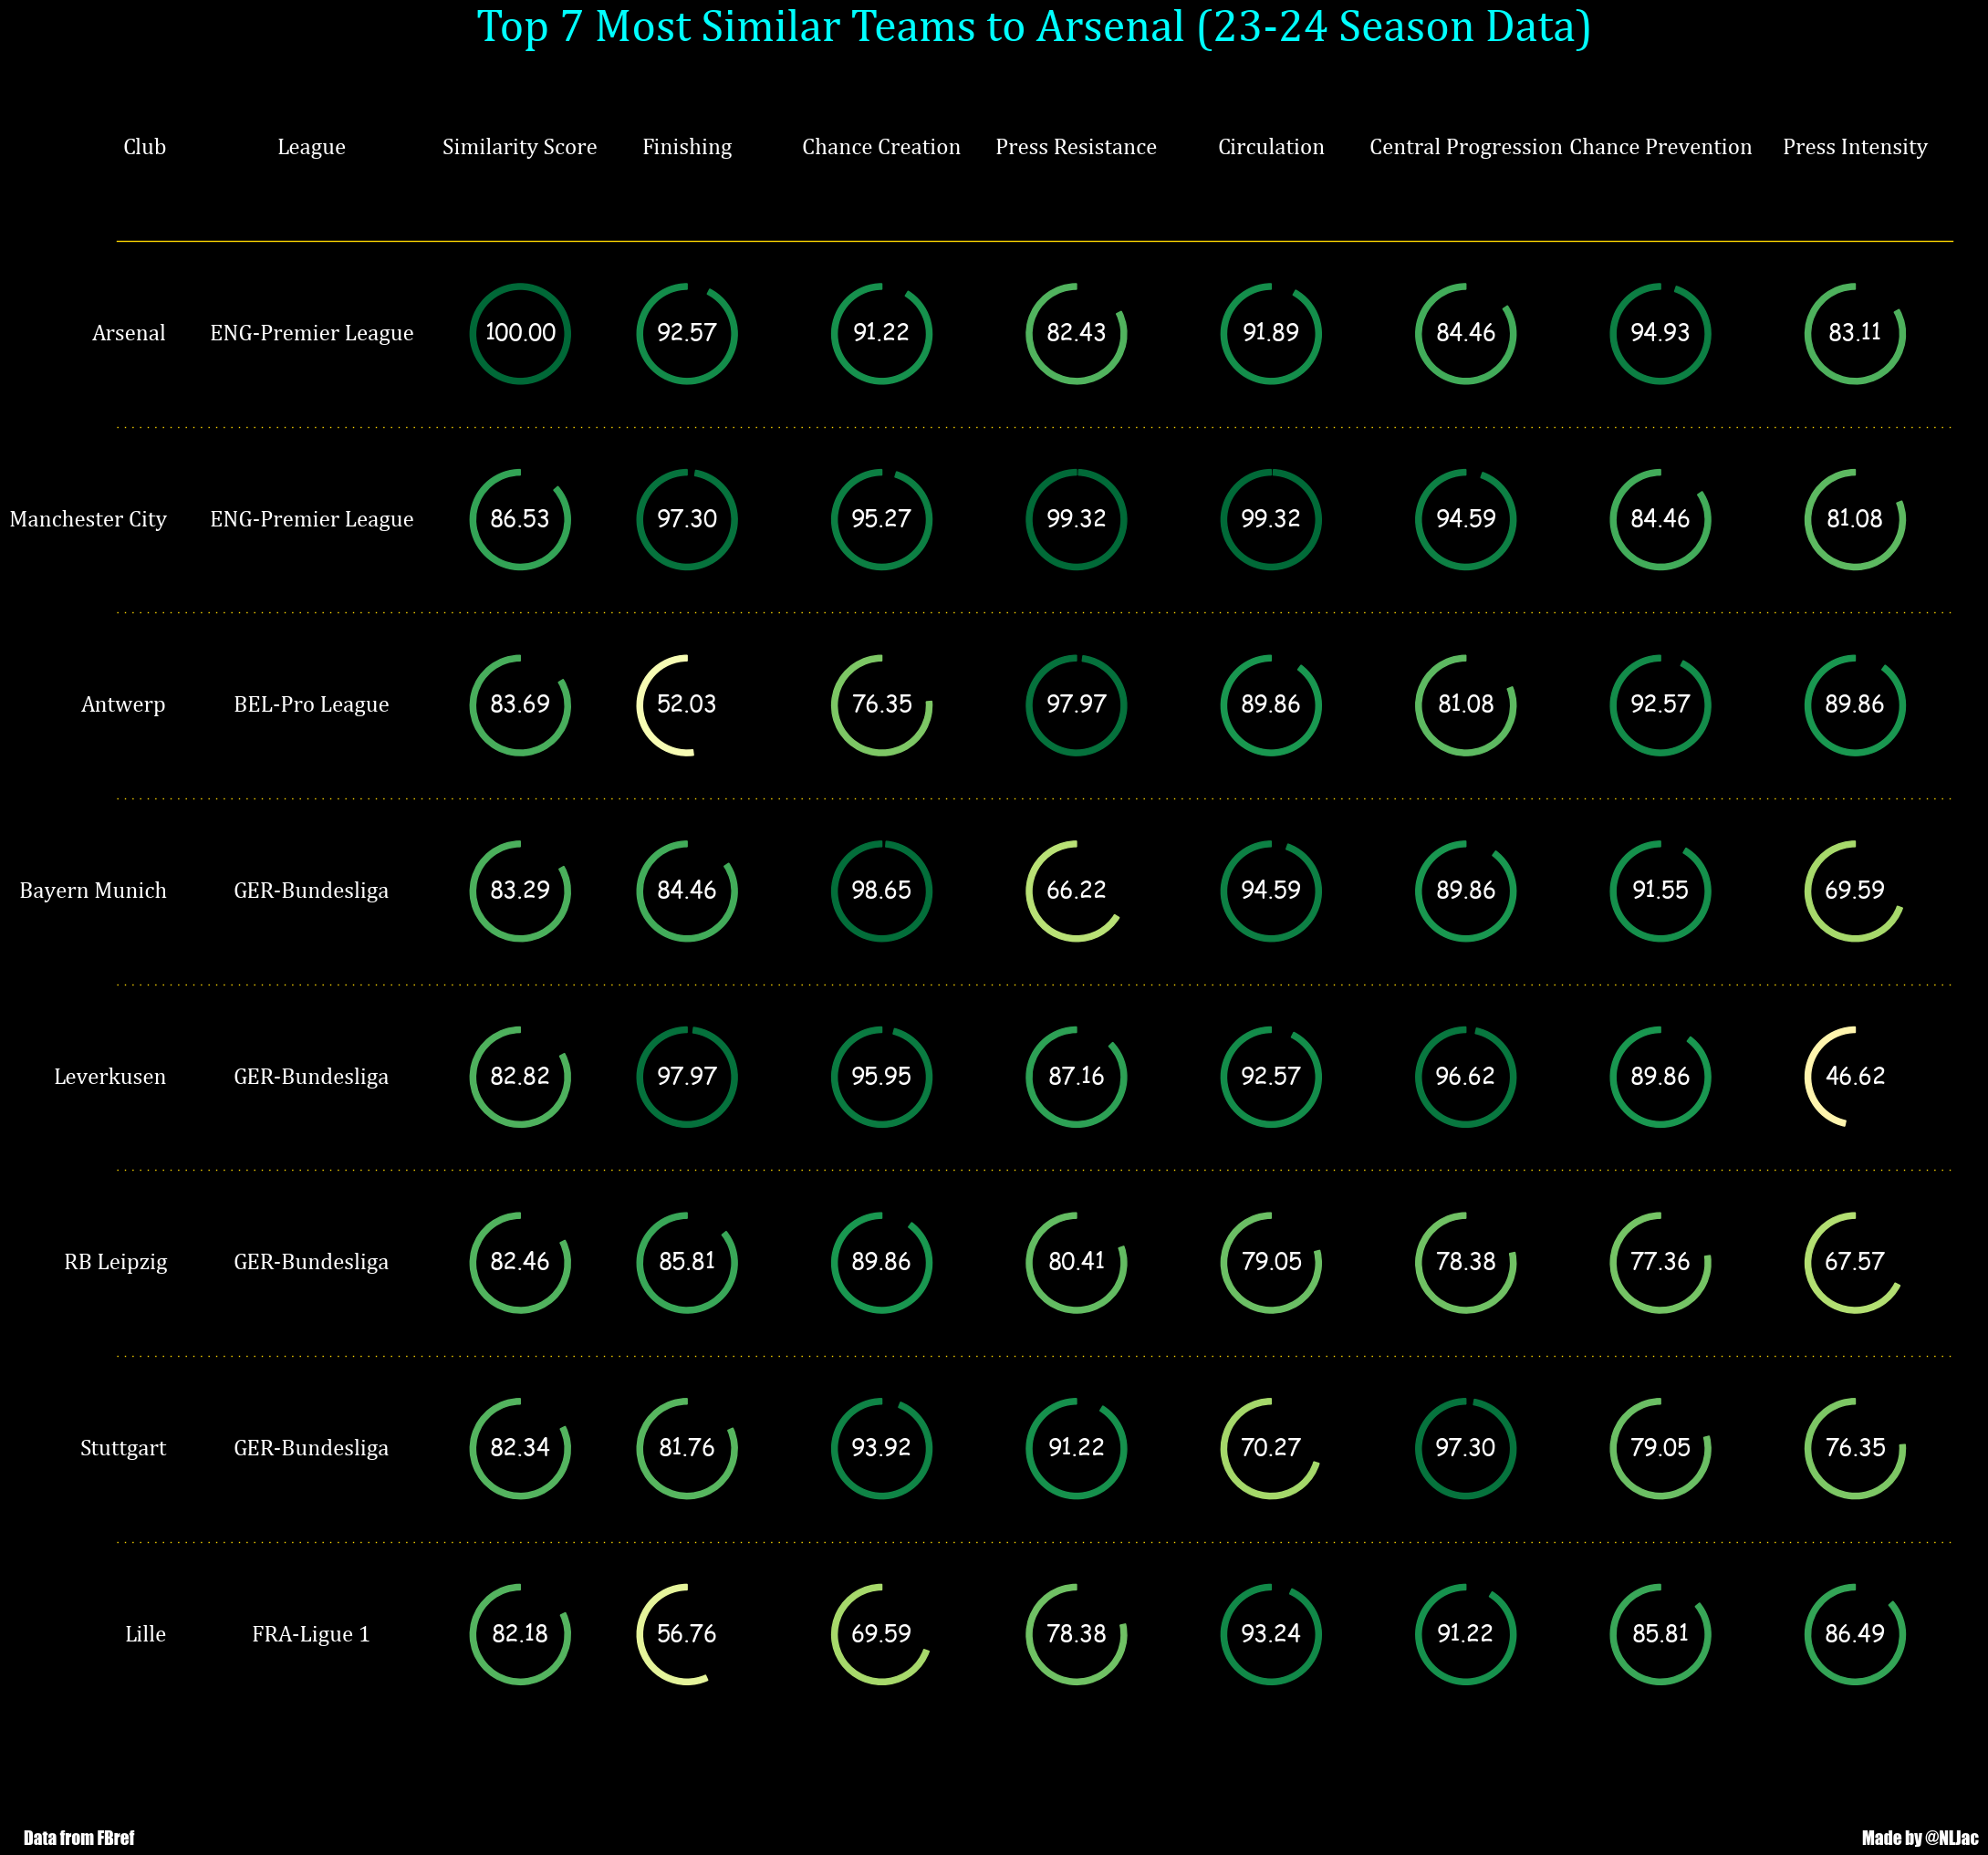

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from plottable import Table, ColumnDefinition
from plottable.plots import progress_donut

# Define the column names without 'Club'
columns = [
    "League",
    "Similarity Score",
    "Finishing",
    "Chance_Creation",
    "Press_Resistance",
    "Circulation",
    "Central_Progression",
    "Chance_Prevention",
    "Press Intensity",
]

# Ensure 'Team' column is not set as the index for team_percentile_data
team_percentile_data.reset_index(inplace=True, drop=True)

# Duplicate the 'Team' column and name it 'Club'
team_percentile_data['Club'] = team_percentile_data['Team']

# Assuming similarity_df and team_percentile_data are already loaded
# Define team and league for the title
team_name = "Arsenal"
league = team_percentile_data.loc[team_percentile_data['Club'] == team_name, 'League'].values[0]

# Extract similarity scores for the specified team
team_similarity = similarity_df.loc[team_name].drop(team_name)
top_10_similar = team_similarity.nlargest(7)

# Fetch details for the top 7 similar teams
top_7_details = team_percentile_data.loc[team_percentile_data['Club'].isin(top_10_similar.index)].copy()
top_7_details['Similarity Score'] = top_10_similar.values

# Include Arsenal's own details
arsenal_details = team_percentile_data.loc[team_percentile_data['Club'] == team_name].copy()
arsenal_details['Similarity Score'] = 100.0  # Assign a similarity score of 100 to Arsenal itself

# Combine Arsenal's details with the top 7 similar teams
top_7_details = pd.concat([arsenal_details, top_7_details])

# Round all decimal values to 2 decimal places
top_7_details = top_7_details.round(2)
score_columns = [
    "Finishing", 
    "Chance_Creation", 
    "Press_Resistance", 
    "Circulation", 
    "Central_Progression", 
    "Chance_Prevention", 
    "Press Intensity"
]
top_7_details[score_columns] = top_7_details[score_columns]

# Set 'Club' as the index
top_7_details.set_index('Club', inplace=True)

# Ensure the columns are ordered correctly
top_7_details = top_7_details[columns]

# Function to get color based on value
def get_color(val):
    cmap = plt.get_cmap('RdYlGn')
    norm = Normalize(vmin=0, vmax=100)
    return cmap(norm(val))

# Custom function to format the displayed text
def formatted_progress_donut(ax, val, **kwargs):
    return progress_donut(ax, val, color=get_color(val), is_pct=False, textprops={'color': 'white', 'fontsize': 18, 'fontname': 'Comic Sans MS'}, formatter="{:.2f}".format(val))

# Update column definitions to include color mapping for the progress donuts
col_defs = [
    ColumnDefinition(name="League", textprops={"ha": "center"}, width=5),
    ColumnDefinition(name="Similarity Score", plot_fn=formatted_progress_donut, textprops={"ha": "center"}, width=2.5),
    ColumnDefinition(name="Finishing", title="Finishing", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center"}, width=3.5),
    ColumnDefinition(name="Chance_Creation", title="Chance Creation", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center"}, width=3.5),
    ColumnDefinition(name="Press_Resistance", title="Press Resistance", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center"}, width=3.5),
    ColumnDefinition(name="Circulation", title="Circulation", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center"}, width=3.5),
    ColumnDefinition(name="Central_Progression", title="Central Progression", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center"}, width=3.5),
    ColumnDefinition(name="Chance_Prevention", title="Chance Prevention", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center"}, width=3.5),
    ColumnDefinition(name="Press Intensity", title="Press Intensity", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center"}, width=3.5),
]

# Create the plot
fig, ax = plt.subplots(figsize=(26, 24))
fig.patch.set_facecolor('black')  # Set figure background color to black
ax.set_facecolor('black') 

# Add title to the plot
plt.title(f"Top 7 Most Similar Teams to {team_name} (23-24 Season Data)", color='cyan', fontsize=36, fontname='Cambria')

# Create and style the table using plottable
table = Table(
    top_7_details,  # Use the DataFrame with 'Club' as the index
    column_definitions=col_defs,
    row_dividers=True,
    footer_divider=True,
    col_label_divider=True,
    ax=ax,
    textprops={"fontsize": 18, "color": "white", 'fontname': 'Cambria'},  # Set text color to white
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5)), "color": "gold"},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-", "color": "gold"},
    column_border_kw={"linewidth": 1, "linestyle": "-", "color": "gold"},
)

ax.text(
    -0.05,  # X position (left edge)
    -0.055,  # Y position (below the plot)
    "Data from FBref",  # Text to display
    fontsize=14,  # Font size
    color='white',  # Text color
    fontname='Impact',  # Font name
    ha='left',  # Horizontal alignment
    va='top',  # Vertical alignment
    transform=ax.transAxes  # Transform coordinates to axes space
)

ax.text(
    0.95,  # X position (left edge)
    -0.055,  # Y position (below the plot)
    "Made by @NLJac",  # Text to display
    fontsize=14,  # Font size
    color='white',  # Text color
    fontname='Impact',  # Font name
    ha='left',  # Horizontal alignment
    va='top',  # Vertical alignment
    transform=ax.transAxes  # Transform coordinates to axes space
)
# Show the plot
plt.show()


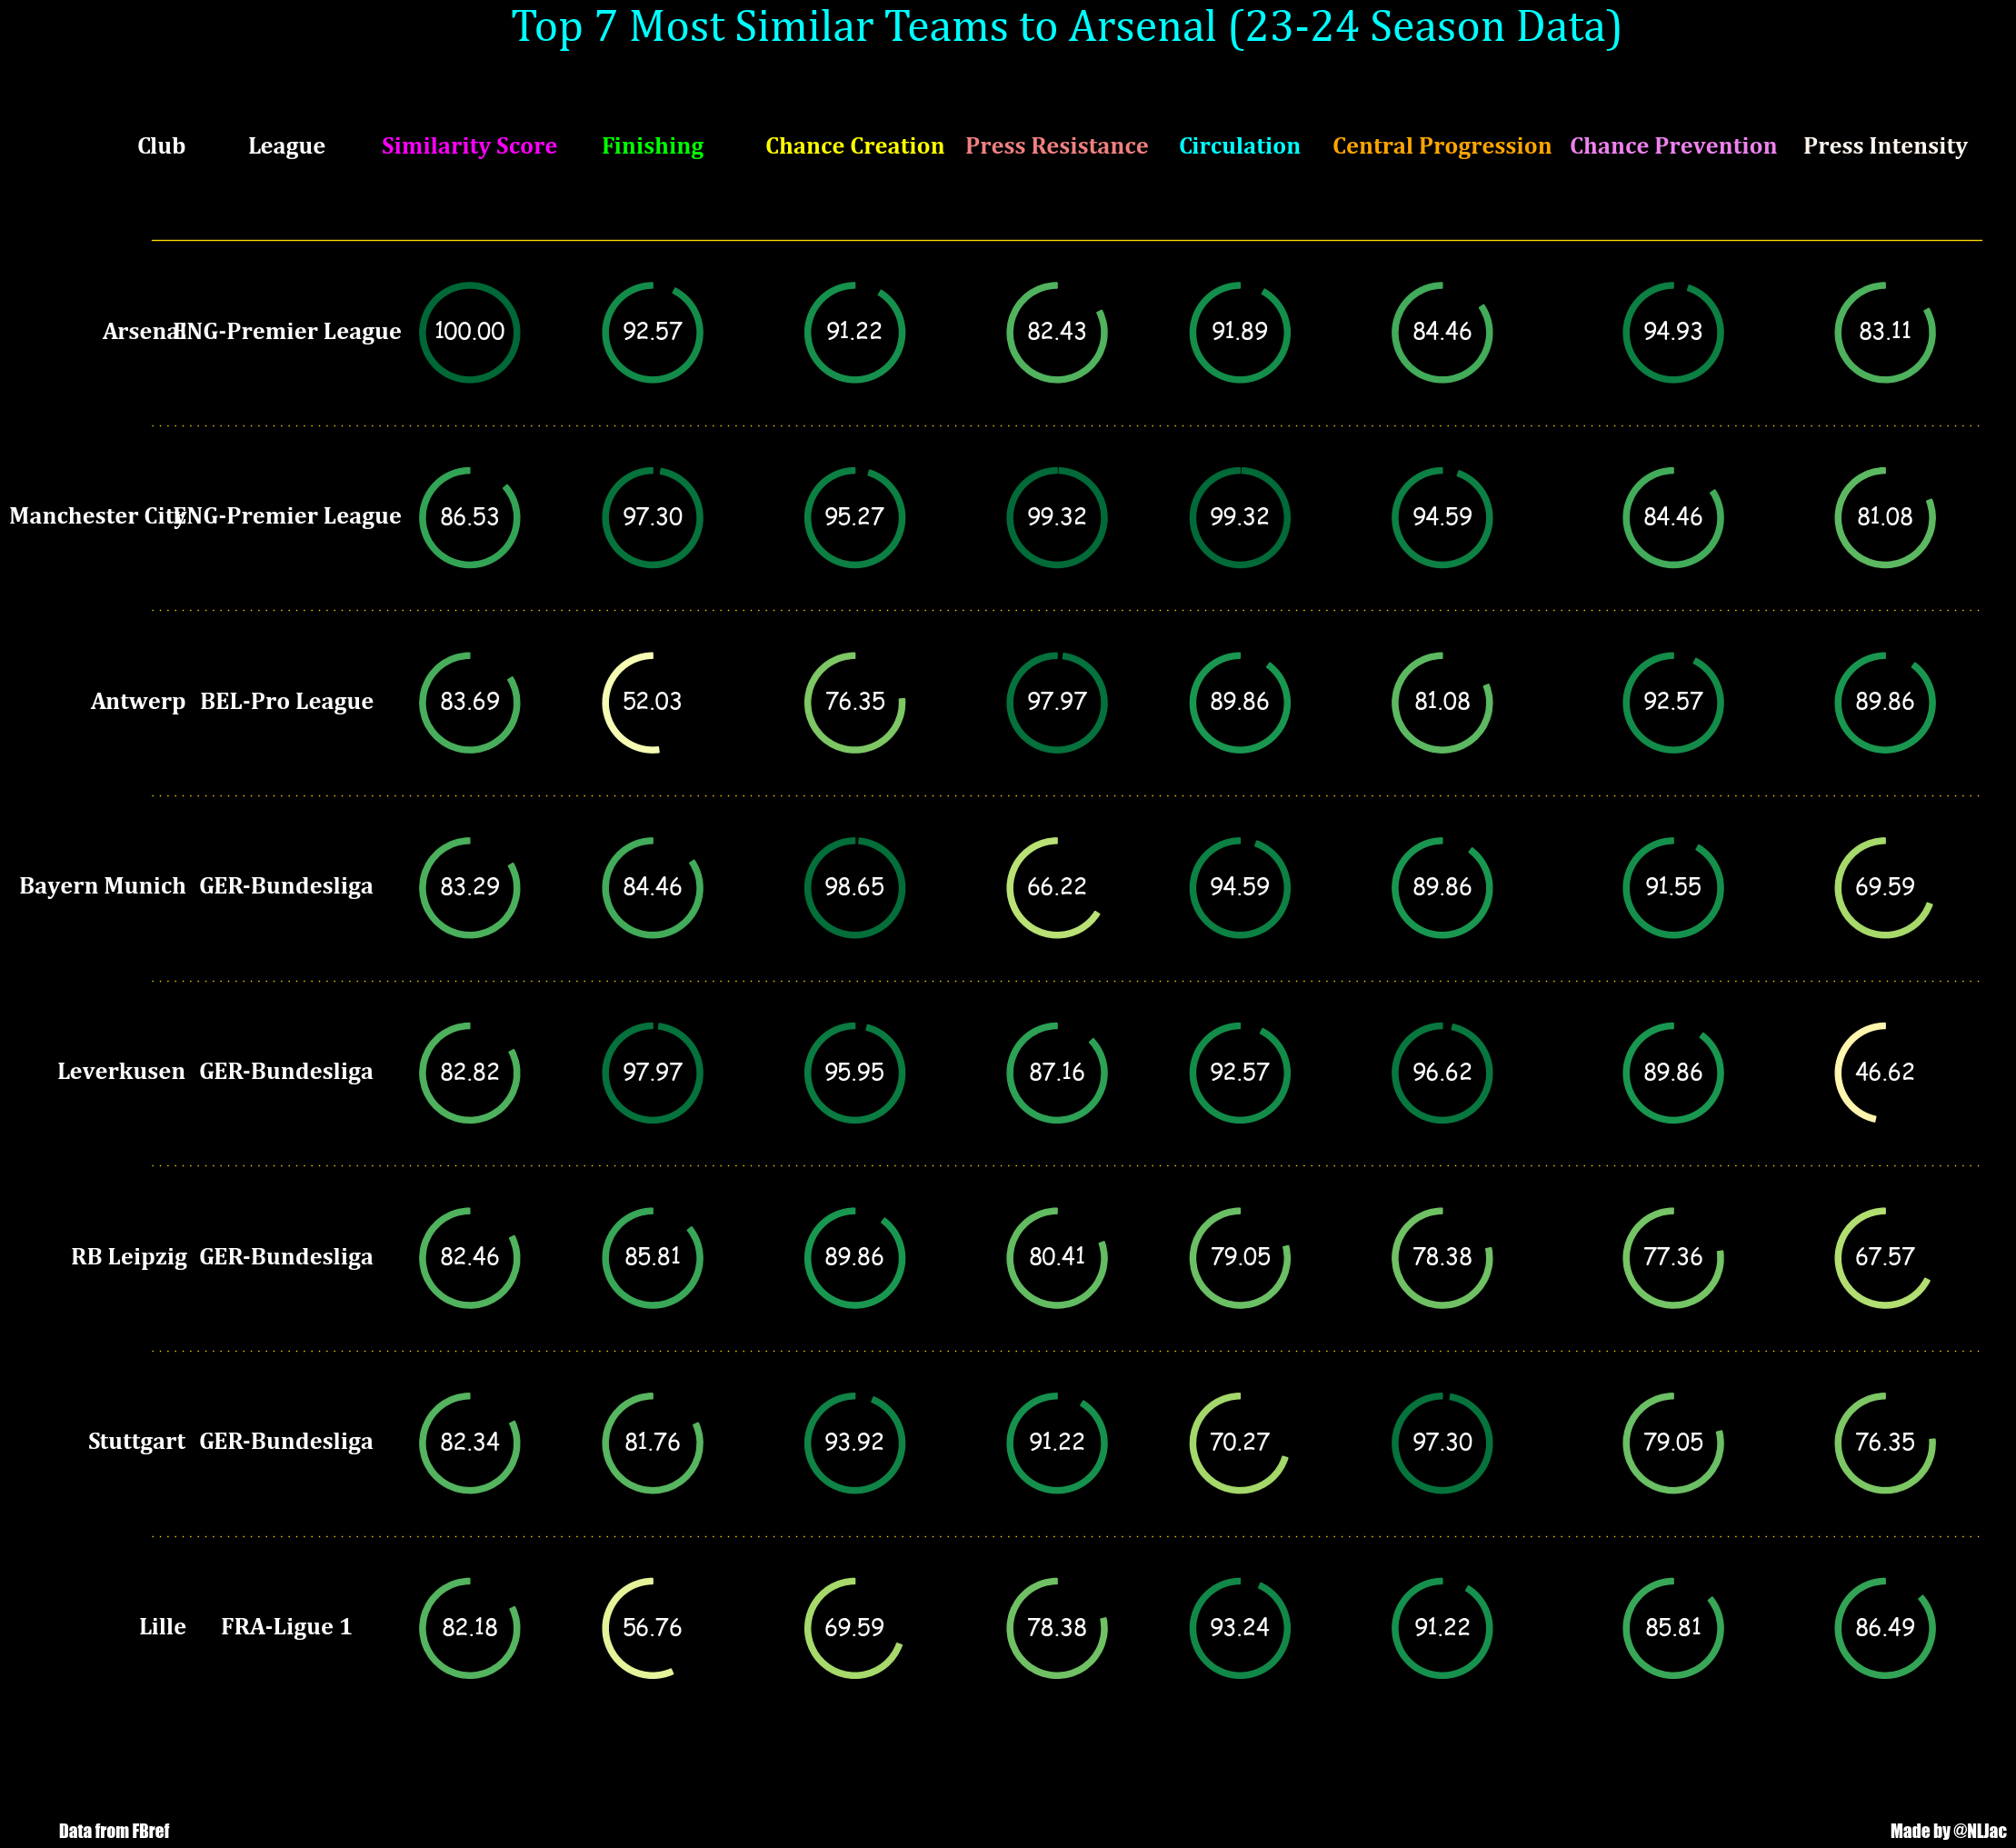

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from plottable import Table, ColumnDefinition
from plottable.plots import progress_donut

# Define the column names without 'Club'
columns = [
    "League",
    "Similarity Score",
    "Finishing",
    "Chance_Creation",
    "Press_Resistance",
    "Circulation",
    "Central_Progression",
    "Chance_Prevention",
    "Press Intensity",
]

# Define the colors for each column header
column_colors = {
    "Similarity Score": "magenta",
    "Finishing": "lime",
    "Chance_Creation": "yellow",
    "Press_Resistance": "lightcoral",
    "Circulation": "cyan",
    "Central_Progression": "orange",
    "Chance_Prevention": "violet",
    "Press Intensity": "seashell",
}

# Ensure 'Team' column is not set as the index for team_percentile_data
team_percentile_data.reset_index(inplace=True, drop=True)

# Duplicate the 'Team' column and name it 'Club'
team_percentile_data['Club'] = team_percentile_data['Team']

# Define team and league for the title
team_name = "Arsenal"
league = team_percentile_data.loc[team_percentile_data['Club'] == team_name, 'League'].values[0]

# Extract similarity scores for the specified team
team_similarity = similarity_df.loc[team_name].drop(team_name)
top_10_similar = team_similarity.nlargest(7)

# Fetch details for the top 7 similar teams
top_7_details = team_percentile_data.loc[team_percentile_data['Club'].isin(top_10_similar.index)].copy()
top_7_details['Similarity Score'] = top_10_similar.values

# Include Arsenal's own details
arsenal_details = team_percentile_data.loc[team_percentile_data['Club'] == team_name].copy()
arsenal_details['Similarity Score'] = 100.0  # Assign a similarity score of 100 to Arsenal itself

# Combine Arsenal's details with the top 7 similar teams
top_7_details = pd.concat([arsenal_details, top_7_details])

# Round all decimal values to 2 decimal places
top_7_details = top_7_details.round(2)
score_columns = [
    "Finishing", 
    "Chance_Creation", 
    "Press_Resistance", 
    "Circulation", 
    "Central_Progression", 
    "Chance_Prevention", 
    "Press Intensity"
]
top_7_details[score_columns] = top_7_details[score_columns]

# Set 'Club' as the index
top_7_details.set_index('Club', inplace=True)

# Ensure the columns are ordered correctly
top_7_details = top_7_details[columns]

# Function to get color based on value
def get_color(val):
    cmap = plt.get_cmap('RdYlGn')
    norm = Normalize(vmin=0, vmax=100)
    return cmap(norm(val))

# Custom function to format the displayed text
def formatted_progress_donut(ax, val, **kwargs):
    return progress_donut(ax, val, color=get_color(val), is_pct=False, textprops={'color': 'white', 'fontsize': 18, 'fontname': 'Comic Sans MS'}, formatter="{:.2f}".format(val))

# Update column definitions to include color mapping for the progress donuts
col_defs = [
    ColumnDefinition(name="League", textprops={"ha": "center"}, width=5),
    ColumnDefinition(name="Similarity Score", plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Similarity Score"]}, width=4.5),
    ColumnDefinition(name="Finishing", title="Finishing", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Finishing"]}, width=5),
    ColumnDefinition(name="Chance_Creation", title="Chance Creation", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Chance_Creation"]}, width=5.5),
    ColumnDefinition(name="Press_Resistance", title="Press Resistance", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Press_Resistance"]}, width=5),
    ColumnDefinition(name="Circulation", title="Circulation", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Circulation"]}, width=4.5),
    ColumnDefinition(name="Central_Progression", title="Central Progression", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Central_Progression"]}, width=6),
    ColumnDefinition(name="Chance_Prevention", title="Chance Prevention", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Chance_Prevention"]}, width=6),
    ColumnDefinition(name="Press Intensity", title="Press Intensity", 
                     plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Press Intensity"]}, width=5),
]

# Create the plot
fig, ax = plt.subplots(figsize=(26, 24))
fig.patch.set_facecolor('black')  # Set figure background color to black
ax.set_facecolor('black') 

# Add title to the plot
plt.title(f"Top 7 Most Similar Teams to {team_name} (23-24 Season Data)", color='cyan', fontsize=36, fontname='Cambria')

# Create and style the table using plottable
table = Table(
    top_7_details,  # Use the DataFrame with 'Club' as the index
    column_definitions=col_defs,
    row_dividers=True,
    footer_divider=True,
    col_label_divider=True,
    ax=ax,
    textprops={"fontsize": 19, "color": "white", 'fontname': 'Cambria', 'fontweight': 'bold'},  # Set text color to white
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5)), "color": "gold"},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-", "color": "gold"},
    column_border_kw={"linewidth": 1, "linestyle": "-", "color": "gold"},
)

# Bold the index (team names) manually
for label in ax.get_yaxis().get_ticklabels():
    label.set_fontweight('bold')

# Add notes to the plot
ax.text(
    -0.05,  # X position (left edge)
    -0.055,  # Y position (below the plot)
    "Data from FBref",  # Text to display
    fontsize=14,  # Font size
    color='white',  # Text color
    fontname='Impact',  # Font name
    ha='left',  # Horizontal alignment
    va='top',  # Vertical alignment
    transform=ax.transAxes  # Transform coordinates to axes space
)

ax.text(
    0.95,  # X position (left edge)
    -0.055,  # Y position (below the plot)
    "Made by @NLJac",  # Text to display
    fontsize=14,  # Font size
    color='white',  # Text color
    fontname='Impact',  # Font name
    ha='left',  # Horizontal alignment
    va='top',  # Vertical alignment
    transform=ax.transAxes  # Transform coordinates to axes space
)

# Show the plot
plt.show()


In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from plottable import Table, ColumnDefinition
from plottable.plots import progress_donut
import os

# Define the column names without 'Club'
columns = [
    "League",
    "Similarity Score",
    "Finishing",
    "Chance_Creation",
    "Press_Resistance",
    "Circulation",
    "Central_Progression",
    "Chance_Prevention",
    "Press Intensity",
]

# Define the colors for each column header
column_colors = {
    "Similarity Score": "magenta",
    "Finishing": "lime",
    "Chance_Creation": "yellow",
    "Press_Resistance": "lightcoral",
    "Circulation": "cyan",
    "Central_Progression": "orange",
    "Chance_Prevention": "violet",
    "Press Intensity": "seashell",
}

# Ensure 'Team' column is not set as the index for team_percentile_data
team_percentile_data.reset_index(inplace=True, drop=True)

# Duplicate the 'Team' column and name it 'Club'
team_percentile_data['Club'] = team_percentile_data['Team']

# Define the path to save the plots
base_path = "C:/Users/jbuck/Dropbox/Soccer_Projects/Similarity Tables"

# Function to save plot for a specific team
def save_team_plot(team_name, team_percentile_data, similarity_df):
    league = team_percentile_data.loc[team_percentile_data['Club'] == team_name, 'League'].values[0]

    # Create directory for the league if it doesn't exist
    league_dir = os.path.join(base_path, league)
    os.makedirs(league_dir, exist_ok=True)

    # Extract similarity scores for the specified team
    team_similarity = similarity_df.loc[team_name].drop(team_name)
    top_10_similar = team_similarity.nlargest(7)

    # Fetch details for the top 7 similar teams
    top_7_details = team_percentile_data.loc[team_percentile_data['Club'].isin(top_10_similar.index)].copy()
    top_7_details['Similarity Score'] = top_10_similar.values

    # Include the team's own details
    team_details = team_percentile_data.loc[team_percentile_data['Club'] == team_name].copy()
    team_details['Similarity Score'] = 100.0  # Assign a similarity score of 100 to the team itself

    # Combine the team's details with the top 7 similar teams
    top_7_details = pd.concat([team_details, top_7_details])

    # Round all decimal values to 2 decimal places
    top_7_details = top_7_details.round(2)
    score_columns = [
        "Finishing", 
        "Chance_Creation", 
        "Press_Resistance", 
        "Circulation", 
        "Central_Progression", 
        "Chance_Prevention", 
        "Press Intensity"
    ]
    top_7_details[score_columns] = top_7_details[score_columns]

    # Set 'Club' as the index
    top_7_details.set_index('Club', inplace=True)

    # Ensure the columns are ordered correctly
    top_7_details = top_7_details[columns]

    # Function to get color based on value
    def get_color(val):
        cmap = plt.get_cmap('RdYlGn')
        norm = Normalize(vmin=0, vmax=100)
        return cmap(norm(val))

    # Custom function to format the displayed text
    def formatted_progress_donut(ax, val, **kwargs):
        return progress_donut(ax, val, color=get_color(val), is_pct=False, textprops={'color': 'white', 'fontsize': 18, 'fontname': 'Comic Sans MS'}, formatter="{:.2f}".format(val))

    # Update column definitions to include color mapping for the progress donuts
    col_defs = [
        ColumnDefinition(name="League", textprops={"ha": "center"}, width=6.5),
        ColumnDefinition(name="Similarity Score", plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Similarity Score"]}, width=4.5),
        ColumnDefinition(name="Finishing", title="Finishing", 
                         plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Finishing"]}, width=5),
        ColumnDefinition(name="Chance_Creation", title="Chance Creation", 
                         plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Chance_Creation"]}, width=5.5),
        ColumnDefinition(name="Press_Resistance", title="Press Resistance", 
                         plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Press_Resistance"]}, width=5),
        ColumnDefinition(name="Circulation", title="Circulation", 
                         plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Circulation"]}, width=4.5),
        ColumnDefinition(name="Central_Progression", title="Central Progression", 
                         plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Central_Progression"]}, width=6),
        ColumnDefinition(name="Chance_Prevention", title="Chance Prevention", 
                         plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Chance_Prevention"]}, width=6),
        ColumnDefinition(name="Press Intensity", title="Press Intensity", 
                         plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Press Intensity"]}, width=5),
    ]

    # Create the plot
    fig, ax = plt.subplots(figsize=(26, 24))
    fig.patch.set_facecolor('black')  # Set figure background color to black
    ax.set_facecolor('black') 

    # Add title to the plot
    plt.title(f"Top 7 Most Similar Teams to {team_name} by Playstyle (23-24 Season)", color='cyan', fontsize=36, fontname='Cambria')

    # Create and style the table using plottable
    table = Table(
        top_7_details,  # Use the DataFrame with 'Club' as the index
        column_definitions=col_defs,
        row_dividers=True,
        footer_divider=True,
        col_label_divider=True,
        ax=ax,
        textprops={"fontsize": 19, "color": "white", 'fontname': 'Cambria', 'fontweight': 'bold'},  # Set text color to white
        row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5)), "color": "gold"},
        col_label_divider_kw={"linewidth": 1, "linestyle": "-", "color": "gold"},
        column_border_kw={"linewidth": 1, "linestyle": "-", "color": "gold"},
    )

    # Bold the index (team names) manually
    for label in ax.get_yaxis().get_ticklabels():
        label.set_fontweight('bold')

    # Add notes to the plot
    ax.text(
        -0.05,  # X position (left edge)
        -0.055,  # Y position (below the plot)
        "Data from FBref",  # Text to display
        fontsize=14,  # Font size
        color='white',  # Text color
        fontname='Impact',  # Font name
        ha='left',  # Horizontal alignment
        va='top',  # Vertical alignment
        transform=ax.transAxes  # Transform coordinates to axes space
    )

    ax.text(
        0.95,  # X position (left edge)
        -0.055,  # Y position (below the plot)
        "Made by @NLJac",  # Text to display
        fontsize=14,  # Font size
        color='white',  # Text color
        fontname='Impact',  # Font name
        ha='left',  # Horizontal alignment
        va='top',  # Vertical alignment
        transform=ax.transAxes  # Transform coordinates to axes space
    )

    # Save the plot to the specified path
    plot_path = os.path.join(league_dir, f"{team_name} Style Similarity Table.png")
    plt.savefig(plot_path, bbox_inches='tight', dpi=300)
    plt.close()

    # Print a confirmation message
    print(f"Plot for {team_name} saved at {plot_path}")

# Iterate through each team in team_percentile_data and save their plots
for team in team_percentile_data['Club'].unique():
    save_team_plot(team, team_percentile_data, similarity_df)


Plot for Arsenal saved at C:/Users/jbuck/Dropbox/Soccer_Projects/Similarity Tables\ENG-Premier League\Arsenal Style Similarity Table.png
Plot for Aston Villa saved at C:/Users/jbuck/Dropbox/Soccer_Projects/Similarity Tables\ENG-Premier League\Aston Villa Style Similarity Table.png
Plot for Bournemouth saved at C:/Users/jbuck/Dropbox/Soccer_Projects/Similarity Tables\ENG-Premier League\Bournemouth Style Similarity Table.png
Plot for Brentford saved at C:/Users/jbuck/Dropbox/Soccer_Projects/Similarity Tables\ENG-Premier League\Brentford Style Similarity Table.png
Plot for Brighton saved at C:/Users/jbuck/Dropbox/Soccer_Projects/Similarity Tables\ENG-Premier League\Brighton Style Similarity Table.png
Plot for Burnley saved at C:/Users/jbuck/Dropbox/Soccer_Projects/Similarity Tables\ENG-Premier League\Burnley Style Similarity Table.png
Plot for Chelsea saved at C:/Users/jbuck/Dropbox/Soccer_Projects/Similarity Tables\ENG-Premier League\Chelsea Style Similarity Table.png
Plot for Crystal Pa